# Introduction #

You'll build a model to predict hotel cancellations with a binary classifier.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')



First, load the *Hotel Cancellations* dataset.

In [31]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [32]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
      
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    

    layers.Dense(1, activation='sigmoid')
])

model.summary()



C:\Users\user\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_12          │ (None, 63)             │           252 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,733 (330.99 KB)

 Trainable params: 83,583 (326.50 KB)

 Non-trainable params: 1,150 (4.49 KB)

# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)


Finally, run this cell to train the model and view the learning curves. It may run for around 60 to 70 epochs, which could take a minute or two.

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.7731 - loss: 0.4790 - val_binary_accuracy: 0.7935 - val_loss: 0.4325
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.8009 - loss: 0.4231 - val_binary_accuracy: 0.8129 - val_loss: 0.4021
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.8078 - loss: 0.4086 - val_binary_accuracy: 0.8143 - val_loss: 0.3942
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8129 - loss: 0.4025 - val_binary_accuracy: 0.8173 - val_loss: 0.3899
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8144 - loss: 0.3963 - val_binary_accuracy: 0.8196 - val_loss: 0.3885
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8181 - loss: 0.3915 - val_binary_accuracy: 0.8194 - val_loss: 0.3830
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.8204 - loss: 0.3880 - val_binary_accuracy: 0.8217 - val_loss: 0.3803

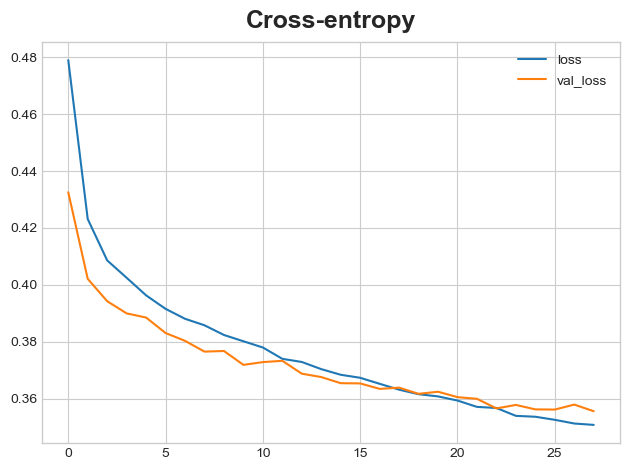

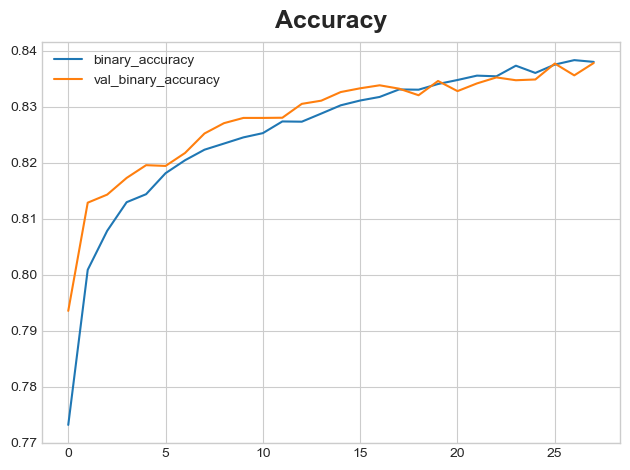

In [34]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
plt.show()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.show()

# 3) Train and Evaluate #


What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?

In [35]:
print("Model Evaluation:")
val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


y_pred_proba = model.predict(X_valid)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()


from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

Model Evaluation:
Validation Loss: 0.3565
Validation Accuracy: 0.8352
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87     18792
           1       0.83      0.70      0.76     11056

    accuracy                           0.84     29848
   macro avg       0.83      0.81      0.82     29848
weighted avg       0.83      0.84      0.83     29848


Confusion Matrix:
[[17208  1584]
 [ 3334  7722]]


In [36]:
# Get the final epoch values
final_train_loss = history_df['loss'].iloc[-1]
final_val_loss = history_df['val_loss'].iloc[-1]
final_train_acc = history_df['binary_accuracy'].iloc[-1]
final_val_acc = history_df['val_binary_accuracy'].iloc[-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Loss: 0.3507
Final Validation Loss: 0.3555
Final Training Accuracy: 0.8380
Final Validation Accuracy: 0.8378


In [37]:
# Analyze the gap between training and validation performance
loss_gap = final_train_loss - final_val_loss
acc_gap = final_train_acc - final_val_acc

print(f"\nPerformance Gaps:")
print(f"Loss gap (train - val): {loss_gap:.4f}")
print(f"Accuracy gap (train - val): {acc_gap:.4f}")


Performance Gaps:
Loss gap (train - val): -0.0048
Accuracy gap (train - val): 0.0002


## What do you think about the learning curves

1. The model shows good generalization with minimal gap between training and validation performance.

## Does the model look underfit or overfit

1. The model shows GOOD BALANCE with minimal overfitting or underfitting

## Was the cross-entropy loss a good stand-in for accuracy?

1. Yes, binary cross-entropy is the standard and most appropriate loss function for binary classification problems. It provides smooth gradients for optimization and directly correlates with classification performance.
2. When cross-entropy decreases, accuracy typically increases. It handles probability outputs well for imbalanced datasets It's more sensitive to wrong predictions than accuracy alone

## Saving the model

In [38]:
import joblib
import tensorflow as tf

In [40]:
model.save('hotel_cancellation_model.keras')
print("✓ Model saved as 'hotel_cancellation_model.keras'")

✓ Model saved as 'hotel_cancellation_model.keras'


## Save the preprocessor

In [41]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
print("✓ Preprocessor saved as 'preprocessor.pkl'")

✓ Preprocessor saved as 'preprocessor.pkl'


## Save feature names

In [42]:
feature_info = {
    'numeric_features': features_num,
    'categorical_features': features_cat,
    'all_features': features_num + features_cat
}
joblib.dump(feature_info, 'feature_info.pkl')
print("✓ Feature information saved")

✓ Feature information saved
